In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [2]:
#orig = pd.read_csv('OlonOlatIntersect_329547.csv')
#dest = pd.read_csv('DlonDlatIntersect_329547.csv')
orig2= pd.read_csv('ForGengGIS/OwithBG.csv')
dest2= pd.read_csv('ForGengGIS/DwithBG.csv')
od   = pd.read_csv('Car2goOD.csv')
#block =pd.read_csv('SelectedBlock.csv')
block2=pd.read_csv('ForGengGIS/bg_selection.csv')
print(orig2.shape, dest2.shape, od.shape, block2.shape)

(329479, 33) (329479, 33) (329478, 14) (560, 17)


/Users/MacBookPro/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Examine data

In [3]:
print(od.columns)
od.tail()

Index(['id', 'otime', 'dtime', 'olon', 'olat', 'dlon', 'dlat', 'distance',
       'ofuel', 'dfuel', 'fuel_consumption', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13'],
      dtype='object')


,id,otime,dtime,olon,olat,dlon,dlat,distance,ofuel,dfuel,fuel_consumption,Unnamed: 11,Unnamed: 12,Unnamed: 13
329473,AXG5757,2016/5/10 23:30,2016/5/10 23:59,-122.31027,47.60822,-122.33710,47.60337,1.298,33,33,0,NaN,NaN,NaN
329474,ATZ5056,2016/5/10 23:34,2016/5/10 23:57,-122.38874,47.68294,-122.36510,47.63340,3.596,63,60,3,NaN,NaN,NaN
329475,AWX9242,2016/5/10 23:36,2016/5/10 23:52,-122.38503,47.66777,-122.37906,47.67311,0.462,100,100,0,NaN,NaN,NaN
329476,ATZ5036,2016/5/10 23:43,2016/5/10 23:48,-122.30742,47.62516,-122.31260,47.62106,0.373,45,45,0,NaN,NaN,NaN
329477,AXG4728,2016/5/10 23:48,2016/5/10 23:58,-122.32785,47.61453,-122.32045,47.62527,0.819,57,54,3,NaN,NaN,NaN


In [5]:
# key for od is id+otime or id+dtime
od[od[['id', 'dtime']].duplicated()]

,id,otime,dtime,olon,olat,dlon,dlat,distance,ofuel,dfuel,fuel_consumption,Unnamed: 11,Unnamed: 12,Unnamed: 13


In [21]:
od.id.describe()

count      329478
unique        806
top       AWY0345
freq          575
Name: id, dtype: object

In [4]:
print(block2.columns)
block2.tail()
# it looks 'OBJECTID_1' is just some ordinary index, and 'OBJECTID' (48-1422) is the real blockgroup id

Index(['OBJECTID', 'STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'BLKGRPCE10',
       'GEOID10', 'NAMELSAD10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10', 'AWATER10',
       'INTPTLAT10', 'INTPTLON10', 'Shape_Leng', 'Shape_Area', 'TRACT',
       'TRBG'],
      dtype='object')


,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,Shape_Leng,Shape_Area,TRACT,TRBG
555,1418,53,33,10401,2,530330104012,Block Group 2,G5030,S,633184.0,0.0,47.554268,-122.297519,15472.379184,6.815354e+06,10401,10401.2
556,1419,53,33,10702,2,530330107022,Block Group 2,G5030,S,207946.0,0.0,47.546221,-122.371588,7259.357753,2.238254e+06,10702,10702.2
557,1420,53,33,26500,2,530330265002,Block Group 2,G5030,S,523894.0,0.0,47.514584,-122.349354,10476.276574,5.639086e+06,26500,26500.2
558,1421,53,33,12000,2,530330120002,Block Group 2,G5030,S,508713.0,0.0,47.510083,-122.380542,13369.288284,5.475700e+06,12000,12000.2
559,1422,53,33,11900,1,530330119001,Block Group 1,G5030,S,590810.0,1320016.0,47.510209,-122.239265,27337.790209,2.056778e+07,11900,11900.1


In [5]:
block2.OBJECTID.describe()

count     560.000000
mean      739.212500
std       409.002897
min        25.000000
25%       404.750000
50%       729.500000
75%      1069.000000
max      1422.000000
Name: OBJECTID, dtype: float64

In [6]:
len(block2.OBJECTID.unique())
#len(block2.OBJECTID_1.unique())

560

In [48]:
print(block.columns)
block.tail()

Index(['OBJECTID', 'STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'BLOCKCE10',
       'GEOID10', 'NAME10', 'MTFCC10', 'UR10', 'UACE10', 'FUNCSTAT10',
       'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'TRACT_10',
       'Shape_Leng', 'Shape_Area', 'TRBL'],
      dtype='object')


,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,TRACT_10,Shape_Leng,Shape_Area,TRBL
16768,35821,53,33,26002,1010,530330260021010,Block 1010,G5040,NaN,NaN,S,3050.0,0.0,47.477009,-122.225155,26002,0.002638,3.639500e-07,26002.1010
16769,35824,53,33,23900,3006,530330239003006,Block 3006,G5040,NaN,NaN,S,25968.0,0.0,47.587391,-122.205143,23900,0.007388,3.105230e-06,23900.3006
16770,35825,53,33,23900,4026,530330239004026,Block 4026,G5040,NaN,NaN,S,6776.0,0.0,47.559004,-122.190780,23900,0.005107,8.098000e-07,23900.4026
16771,35826,53,33,24602,2008,530330246022008,Block 2008,G5040,NaN,NaN,S,25779.0,0.0,47.537500,-122.220007,24602,0.008605,3.079560e-06,24602.2008
16772,35832,53,33,22102,1018,530330221021018,Block 1018,G5040,NaN,NaN,S,79243.0,0.0,47.736264,-122.218108,22102,0.019371,9.502250e-06,22102.1018


In [ ]:
# block has 16773 rows
# the key is TRACTCE10+BLOCKCE10, or OBJECTID

In [54]:
len(block.OBJECTID.unique())

16773

In [34]:
block.groupby(['TRACTCE10','BLOCKCE10']).count().OBJECTID.shape

(16773,)

(0, 10000)

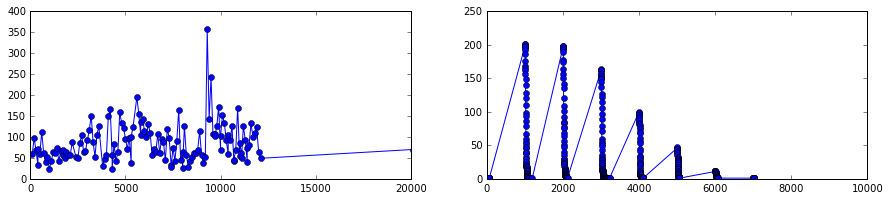

In [32]:
# each tract can have multiple blocks
plt.figure(figsize=(15, 3))
plt.subplot(121)
plt.plot(block.groupby(['TRACTCE10']).count().OBJECTID, 'o-')
plt.xlim(0,20000)

# each tract can have multiple blocks
plt.subplot(122)
plt.plot(block.groupby(['BLOCKCE10']).count().OBJECTID, 'o-')
plt.xlim(0,10000)

In [7]:
print(od.columns, block2.columns)

Index(['id', 'otime', 'dtime', 'olon', 'olat', 'dlon', 'dlat', 'distance',
       'ofuel', 'dfuel', 'fuel_consumption', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13'],
      dtype='object') Index(['OBJECTID', 'STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'BLKGRPCE10',
       'GEOID10', 'NAMELSAD10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10', 'AWATER10',
       'INTPTLAT10', 'INTPTLON10', 'Shape_Leng', 'Shape_Area', 'TRACT',
       'TRBG'],
      dtype='object')


In [9]:
print(orig2.columns)
orig2.loc[:, :].tail()

Index(['FID_kc_bg_', 'OBJECTID', 'STATEFP10', 'COUNTYFP10', 'TRACTCE10',
       'BLKGRPCE10', 'GEOID10', 'NAMELSAD10', 'MTFCC10', 'FUNCSTAT10',
       'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'Shape_Leng',
       'Shape_Area', 'TRACT', 'TRBG', 'FID_ocars', 'id', 'otime', 'dtime',
       'olon', 'olat', 'dlon', 'dlat', 'distance', 'ofuel', 'dfuel',
       'fuel_consu', 'F12', 'F13', 'F14'],
      dtype='object')


,FID_kc_bg_,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,...,olat,dlon,dlat,distance,ofuel,dfuel,fuel_consu,F12,F13,F14
329474,1206,1207,53,33,21000,3,530330210003,Block Group 3,G5030,S,...,47.73429,-122.31433,47.65696,5.500,100.0,96.0,4.0,NaN,NaN,NaN
329475,1210,1211,53,33,20900,1,530330209001,Block Group 1,G5030,S,...,47.73424,-122.35657,47.71422,1.466,45.0,42.0,3.0,NaN,NaN,NaN
329476,1210,1211,53,33,20900,1,530330209001,Block Group 1,G5030,S,...,47.73426,-122.35620,47.72907,0.589,24.0,24.0,0.0,NaN,NaN,NaN
329477,1210,1211,53,33,20900,1,530330209001,Block Group 1,G5030,S,...,47.73427,-122.34492,47.69924,2.421,100.0,100.0,0.0,NaN,NaN,NaN
329478,1210,1211,53,33,20900,1,530330209001,Block Group 1,G5030,S,...,47.73431,-122.39058,47.67246,4.745,42.0,42.0,0.0,NaN,NaN,NaN


In [13]:
print(len(orig2.FID_kc_bg_.unique()), len(orig2.OBJECTID.unique()))
print(orig2.FID_kc_bg_.describe())
print(orig2.OBJECTID.describe())
# these 2 differ in 0-index or 1-index

494 494
count    329479.000000
mean        823.389075
std         429.724160
min          47.000000
25%         410.000000
50%         903.000000
75%        1225.000000
max        1421.000000
Name: FID_kc_bg_, dtype: float64
count    329479.000000
mean        830.577530
std         429.598419
min          48.000000
25%         411.000000
50%         958.000000
75%        1226.000000
max        1422.000000
Name: OBJECTID, dtype: float64


In [25]:
print(block2[block2.OBJECTID == 1422]['Shape_Area'])
#orig2[orig2.OBJECTID == 1422]['Shape_Area']

559    2.056778e+07
Name: Shape_Area, dtype: float64


In [26]:
orig2.FID_ocars.describe()

count    329479.000000
mean     164737.698381
std       95111.614512
min           0.000000
25%       82369.500000
50%      164740.000000
75%      247104.500000
max      329477.000000
Name: FID_ocars, dtype: float64

In [11]:
print(orig.columns)
orig.loc[:, :'BLOCKCE10'].tail()

Index(['OBJECTID', 'FID_Select', 'id', 'otime', 'dtime', 'olon', 'olat',
       'dlon', 'dlat', 'distance', 'ofuel', 'dfuel', 'fuel_consu',
       'FID_Sele_1', 'OBJECTID_1', 'STATEFP10', 'COUNTYFP10', 'TRACTCE10',
       'BLKGRPCE10', 'GEOID10', 'NAMELSAD10', 'MTFCC10', 'FUNCSTAT10',
       'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'Shape_Leng',
       'TRACT', 'TRBG'],
      dtype='object')


In [ ]:
# OBJECTID is the col from block
# FID_OlonOl is the index from od
# Im not sure how OBJECTID_1 was generated. maybe when merged in arcgis?

In [20]:
len(orig.OBJECTID.unique())

9000

In [70]:
orig.OBJECTID.describe()

count    329547.000000
mean      18148.949230
std        9573.392181
min           1.000000
25%       10540.000000
50%       18850.000000
75%       25820.000000
max       35434.000000
Name: OBJECTID, dtype: float64

In [74]:
orig.FID_OlonOl.describe()

count    329547.000000
mean     164739.058316
std       95110.515886
min           0.000000
25%       82375.500000
50%      164739.000000
75%      247104.500000
max      329477.000000
Name: FID_OlonOl, dtype: float64

In [34]:
orig2[orig2.FID_ocars == 101]['id']
od.iloc[101]['id']

61799    AXG5610
Name: id, dtype: object

In [35]:
dest2.columns

Index(['FID_kc_bg_', 'OBJECTID', 'STATEFP10', 'COUNTYFP10', 'TRACTCE10',
       'BLKGRPCE10', 'GEOID10', 'NAMELSAD10', 'MTFCC10', 'FUNCSTAT10',
       'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'Shape_Leng',
       'Shape_Area', 'TRACT', 'TRBG', 'FID_dcarst', 'id', 'otime', 'dtime',
       'olon', 'olat', 'dlon', 'dlat', 'distance', 'ofuel', 'dfuel',
       'fuel_consu', 'F12', 'F13', 'F14'],
      dtype='object')

# Process Data

In [37]:
# clean duplicate in orig and dest
# we verified that arcgis can place a pt twice in 2 regions if the pt falls on the boundary
# note that we have 329473 pts, compared to 329478 from od. cuz we threw out 5 pts out of bound
print(orig2.shape, dest2.shape)
orig2=orig2[~ orig2['FID_ocars'].duplicated()]
dest2=dest2[~ dest2['FID_dcarst'].duplicated()]
print(orig2.shape, dest2.shape)

(329479, 33) (329479, 33)
(329470, 33) (329470, 33)


In [38]:
# add fid explicitly in od
od['fid']=od.index
od.head()

,id,otime,dtime,olon,olat,dlon,dlat,distance,ofuel,dfuel,fuel_consumption,Unnamed: 11,Unnamed: 12,Unnamed: 13,fid
0,AXG5761,2016/1/23 0:02,2016/1/23 0:29,-122.34148,47.63633,-122.34857,47.65491,1.326,63,63,0,NaN,NaN,NaN,0
1,ATZ5067,2016/1/23 0:02,2016/1/23 0:18,-122.30490,47.61251,-122.31481,47.58820,1.742,30,30,0,NaN,NaN,NaN,1
2,AUK2223,2016/1/23 0:02,2016/1/23 0:27,-122.28432,47.55700,-122.35897,47.66690,8.355,100,100,0,NaN,NaN,NaN,2
3,ATS2928,2016/1/23 0:04,2016/1/23 0:25,-122.36445,47.66644,-122.34596,47.70566,2.844,100,100,0,NaN,NaN,NaN,3
4,AXG4702,2016/1/23 0:04,2016/1/23 0:51,-122.33523,47.57528,-122.38755,47.68656,8.067,54,51,3,NaN,NaN,NaN,4


In [39]:
keepcol = ['id', 'otime', 'dtime', 'fid' ]
od = od.drop([col for col in od.columns if col not in keepcol], axis=1)
od.head()

,id,otime,dtime,fid
0,AXG5761,2016/1/23 0:02,2016/1/23 0:29,0
1,ATZ5067,2016/1/23 0:02,2016/1/23 0:18,1
2,AUK2223,2016/1/23 0:02,2016/1/23 0:27,2
3,ATS2928,2016/1/23 0:04,2016/1/23 0:25,3
4,AXG4702,2016/1/23 0:04,2016/1/23 0:51,4


In [40]:
orig2.columns

Index(['FID_kc_bg_', 'OBJECTID', 'STATEFP10', 'COUNTYFP10', 'TRACTCE10',
       'BLKGRPCE10', 'GEOID10', 'NAMELSAD10', 'MTFCC10', 'FUNCSTAT10',
       'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'Shape_Leng',
       'Shape_Area', 'TRACT', 'TRBG', 'FID_ocars', 'id', 'otime', 'dtime',
       'olon', 'olat', 'dlon', 'dlat', 'distance', 'ofuel', 'dfuel',
       'fuel_consu', 'F12', 'F13', 'F14'],
      dtype='object')

In [41]:
keepcol = ['id', 'otime', 'dtime', 'OBJECTID', 'Shape_Area']
# orig = orig.drop([col for col in orig.columns if col not in keepcol], axis=1)
# orig.head()

o=pd.DataFrame()
for col in keepcol:
    o['o_'+ col] = orig2[col]
o['fid'] = orig2.FID_ocars
o.head()

,o_id,o_otime,o_dtime,o_OBJECTID,o_Shape_Area,fid
0,AXG5024,3/13/2016,3/13/2016,131,7.307315e+06,153629
1,AXG5473,3/2/2016,3/2/2016,131,7.307315e+06,118750
2,AXG4694,4/25/2016,4/25/2016,131,7.307315e+06,290159
3,AXG4772,2/21/2016,2/21/2016,131,7.307315e+06,89665
4,AXG5473,3/29/2016,3/29/2016,131,7.307315e+06,207443


In [42]:
dest2.columns

Index(['FID_kc_bg_', 'OBJECTID', 'STATEFP10', 'COUNTYFP10', 'TRACTCE10',
       'BLKGRPCE10', 'GEOID10', 'NAMELSAD10', 'MTFCC10', 'FUNCSTAT10',
       'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'Shape_Leng',
       'Shape_Area', 'TRACT', 'TRBG', 'FID_dcarst', 'id', 'otime', 'dtime',
       'olon', 'olat', 'dlon', 'dlat', 'distance', 'ofuel', 'dfuel',
       'fuel_consu', 'F12', 'F13', 'F14'],
      dtype='object')

In [43]:
keepcol = ['id', 'otime', 'dtime', 'OBJECTID', 'Shape_Area']
#dest = dest.drop([col for col in dest.columns if col not in keepcol], axis=1)
#dest.head()

d=pd.DataFrame()
for col in keepcol:
    d['d_'+ col] = dest2[col]
d['fid'] = dest2.FID_dcarst
d.head()

,d_id,d_otime,d_dtime,d_OBJECTID,d_Shape_Area,fid
0,AKN2764,4/8/2016,4/8/2016,822,8.835412e+06,242713
1,AXG5024,3/12/2016,3/12/2016,131,7.307315e+06,152205
2,AXG5473,3/1/2016,3/1/2016,131,7.307315e+06,117152
3,AXG4694,4/24/2016,4/24/2016,131,7.307315e+06,289835
4,AXG4772,2/20/2016,2/20/2016,131,7.307315e+06,87616


In [44]:
d.sort_values('fid').head()

,d_id,d_otime,d_dtime,d_OBJECTID,d_Shape_Area,fid
231052,AXG5761,1/23/2016,1/23/2016,329,3.658591e+06,0
43582,ATZ5067,1/23/2016,1/23/2016,956,1.264760e+06,1
261893,AUK2223,1/23/2016,1/23/2016,334,2.971310e+06,2
318462,ATS2928,1/23/2016,1/23/2016,974,2.638438e+06,3
301885,AXG4702,1/23/2016,1/23/2016,698,3.291448e+06,4


In [45]:
o.sort_values('fid').head()

,o_id,o_otime,o_dtime,o_OBJECTID,o_Shape_Area,fid
196430,AXG5761,1/23/2016,1/23/2016,1391,5.227531e+06,0
95870,ATZ5067,1/23/2016,1/23/2016,1133,2.078485e+06,1
16948,AUK2223,1/23/2016,1/23/2016,594,3.974056e+06,2
260918,ATS2928,1/23/2016,1/23/2016,331,3.086695e+06,3
30613,AXG4702,1/23/2016,1/23/2016,957,7.246766e+07,4


In [46]:
od.head()

,id,otime,dtime,fid
0,AXG5761,2016/1/23 0:02,2016/1/23 0:29,0
1,ATZ5067,2016/1/23 0:02,2016/1/23 0:18,1
2,AUK2223,2016/1/23 0:02,2016/1/23 0:27,2
3,ATS2928,2016/1/23 0:04,2016/1/23 0:25,3
4,AXG4702,2016/1/23 0:04,2016/1/23 0:51,4


In [64]:
# now we have od, o and d
ood = pd.merge(o, od, on='fid')
oodd =pd.merge(ood, d, on='fid')
oodd.head()

,o_id,o_otime,o_dtime,o_OBJECTID,o_Shape_Area,fid,id,otime,dtime,d_id,d_otime,d_dtime,d_OBJECTID,d_Shape_Area
0,AXG5024,3/13/2016,3/13/2016,131,7.307315e+06,153629,AXG5024,2016/3/13 7:33,2016/3/13 8:16,AXG5024,3/13/2016,3/13/2016,1225,2.551659e+06
1,AXG5473,3/2/2016,3/2/2016,131,7.307315e+06,118750,AXG5473,2016/3/2 5:28,2016/3/2 5:49,AXG5473,3/2/2016,3/2/2016,958,2.864498e+07
2,AXG4694,4/25/2016,4/25/2016,131,7.307315e+06,290159,AXG4694,2016/4/25 6:00,2016/4/25 6:37,AXG4694,4/25/2016,4/25/2016,1410,8.603791e+06
3,AXG4772,2/21/2016,2/21/2016,131,7.307315e+06,89665,AXG4772,2016/2/21 12:57,2016/2/21 13:38,AXG4772,2/21/2016,2/21/2016,1308,3.171054e+06
4,AXG5473,3/29/2016,3/29/2016,131,7.307315e+06,207443,AXG5473,2016/3/29 12:03,2016/3/29 12:27,AXG5473,3/29/2016,3/29/2016,680,2.607712e+06


In [65]:
oodd.columns

Index(['o_id', 'o_otime', 'o_dtime', 'o_OBJECTID', 'o_Shape_Area', 'fid', 'id',
       'otime', 'dtime', 'd_id', 'd_otime', 'd_dtime', 'd_OBJECTID',
       'd_Shape_Area'],
      dtype='object')

In [66]:
oodd.d_id.equals(oodd.id)

True

In [67]:
oodd = oodd.drop(['o_id', 'o_otime', 'o_dtime', 'd_id', 'd_otime','d_dtime'],axis=1)

In [68]:
oodd.head()

,o_OBJECTID,o_Shape_Area,fid,id,otime,dtime,d_OBJECTID,d_Shape_Area
0,131,7.307315e+06,153629,AXG5024,2016/3/13 7:33,2016/3/13 8:16,1225,2.551659e+06
1,131,7.307315e+06,118750,AXG5473,2016/3/2 5:28,2016/3/2 5:49,958,2.864498e+07
2,131,7.307315e+06,290159,AXG4694,2016/4/25 6:00,2016/4/25 6:37,1410,8.603791e+06
3,131,7.307315e+06,89665,AXG4772,2016/2/21 12:57,2016/2/21 13:38,1308,3.171054e+06
4,131,7.307315e+06,207443,AXG5473,2016/3/29 12:03,2016/3/29 12:27,680,2.607712e+06


In [69]:
print(len(oodd.d_OBJECTID.unique()), len(oodd.o_OBJECTID.unique()))

495 494


In [70]:
#oodd.to_pickle('oodd2.df')
#oodd = pd.read_pickle('oodd2.df')

In [71]:
oodd['ohour']= pd.DatetimeIndex(oodd.otime).hour
oodd['dhour']= pd.DatetimeIndex(oodd.dtime).hour

In [78]:
oodd.head()

,o_OBJECTID,o_Shape_Area,fid,id,otime,dtime,d_OBJECTID,d_Shape_Area,ohour,dhour
0,131,7.307315e+06,153629,AXG5024,2016/3/13 7:33,2016/3/13 8:16,1225,2.551659e+06,7,8
1,131,7.307315e+06,118750,AXG5473,2016/3/2 5:28,2016/3/2 5:49,958,2.864498e+07,5,5
2,131,7.307315e+06,290159,AXG4694,2016/4/25 6:00,2016/4/25 6:37,1410,8.603791e+06,6,6
3,131,7.307315e+06,89665,AXG4772,2016/2/21 12:57,2016/2/21 13:38,1308,3.171054e+06,12,13
4,131,7.307315e+06,207443,AXG5473,2016/3/29 12:03,2016/3/29 12:27,680,2.607712e+06,12,12


In [79]:
dmap=oodd.groupby(['dhour','d_OBJECTID']).fid.count()
omap=oodd.groupby(['ohour','o_OBJECTID']).fid.count()

In [80]:
dmap.unstack(level=0, fill_value=0).shape

(495, 24)

In [81]:
influxmap = dmap.unstack(level=0,fill_value=0)-omap.unstack(level=0, fill_value=0)
influxmap

dhour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
48,0.0,0.0,-1.0,-1.0,1.0,0.0,-3.0,-6.0,2.0,-1.0,...,-2.0,4.0,3.0,0.0,3.0,-1.0,1.0,0.0,3.0,1.0
49,0.0,0.0,1.0,2.0,1.0,0.0,-2.0,-3.0,0.0,0.0,...,-1.0,0.0,1.0,0.0,0.0,-1.0,0.0,-1.0,0.0,1.0
50,-1.0,1.0,1.0,0.0,0.0,-3.0,-3.0,-4.0,-3.0,-1.0,...,-6.0,-1.0,-1.0,1.0,-1.0,7.0,6.0,1.0,-2.0,0.0
51,-1.0,0.0,0.0,1.0,-1.0,-8.0,-14.0,-8.0,-1.0,-2.0,...,-3.0,-2.0,1.0,11.0,1.0,3.0,14.0,8.0,2.0,2.0
52,5.0,0.0,0.0,10.0,-1.0,-2.0,-5.0,5.0,-40.0,-16.0,...,7.0,30.0,26.0,4.0,1.0,3.0,-21.0,-17.0,8.0,10.0
53,8.0,2.0,1.0,0.0,-2.0,-17.0,-28.0,-39.0,-28.0,-13.0,...,7.0,8.0,2.0,21.0,29.0,6.0,7.0,22.0,11.0,10.0
54,0.0,4.0,1.0,3.0,2.0,5.0,27.0,52.0,58.0,7.0,...,-8.0,6.0,-58.0,-11.0,-8.0,-13.0,-8.0,-4.0,-13.0,-1.0
55,7.0,0.0,2.0,1.0,-2.0,-5.0,-13.0,-25.0,-42.0,-8.0,...,16.0,0.0,10.0,4.0,20.0,14.0,18.0,11.0,4.0,2.0
56,15.0,2.0,0.0,-1.0,0.0,4.0,65.0,49.0,15.0,7.0,...,-15.0,-8.0,-44.0,-20.0,-13.0,8.0,-14.0,-15.0,-8.0,-9.0
57,5.0,8.0,1.0,-1.0,-7.0,-32.0,-40.0,6.0,-16.0,-31.0,...,4.0,14.0,-3.0,6.0,5.0,23.0,-5.0,30.0,8.0,16.0


In [82]:
os=set(oodd.o_OBJECTID.unique())
ds=set(oodd.d_OBJECTID.unique())

In [83]:
len(ds |os )

495

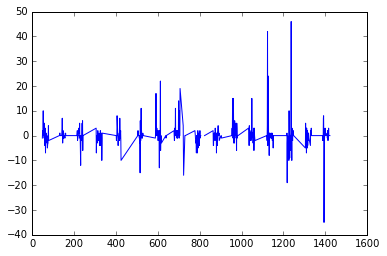

In [87]:
plt.plot(influxmap.ix[:,3])

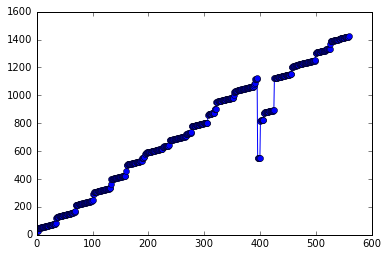

In [90]:
plt.plot(block2.OBJECTID,'o-')

In [91]:
influxmap.to_pickle('influxmap_blockgroup.df')


# how to get normalized by area

In [93]:
oodd.o_Shape_Area.describe()

count    3.294620e+05
mean     6.928987e+06
std      1.420421e+07
min      2.015619e+05
25%      2.273632e+06
50%      3.611785e+06
75%      5.937434e+06
max      2.579110e+09
Name: o_Shape_Area, dtype: float64

In [98]:
influxmap.shape

(495, 24)

In [103]:
block2.OBJECTID == list(ds|os)

TypeError: invalid type comparison

In [118]:
block2.OBJECTID[influxmap.index]


48      140.0
49      141.0
50      142.0
51      143.0
52      144.0
53      145.0
54      146.0
55      147.0
56      148.0
57      149.0
58      150.0
59      151.0
60      152.0
61      153.0
62      156.0
63      157.0
64      158.0
65      159.0
66      160.0
67      161.0
68      167.0
69      172.0
70      213.0
71      214.0
72      215.0
73      216.0
74      217.0
75      218.0
76      219.0
77      220.0
        ...  
1388      NaN
1389      NaN
1390      NaN
1391      NaN
1392      NaN
1393      NaN
1394      NaN
1395      NaN
1396      NaN
1397      NaN
1398      NaN
1399      NaN
1400      NaN
1401      NaN
1403      NaN
1404      NaN
1405      NaN
1409      NaN
1410      NaN
1411      NaN
1412      NaN
1413      NaN
1415      NaN
1416      NaN
1417      NaN
1418      NaN
1419      NaN
1420      NaN
1421      NaN
1422      NaN
Name: OBJECTID, dtype: float64

In [119]:
influxmap.index

Int64Index([  48,   49,   50,   51,   52,   53,   54,   55,   56,   57,
            ...
            1412, 1413, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422],
           dtype='int64', length=495)

In [125]:
block2.ix['OBJECTID'==1422]

KeyError: False

In [121]:
block2

,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,Shape_Leng,Shape_Area,TRACT,TRBG
0,25,53,33,27500,2,530330275002,Block Group 2,G5030,S,692948.0,0.0,47.482811,-122.336498,13870.306870,7.458847e+06,27500,27500.2
1,26,53,33,27400,4,530330274004,Block Group 4,G5030,S,455722.0,0.0,47.488087,-122.330058,11860.076920,4.905347e+06,27400,27400.4
2,27,53,33,27400,1,530330274001,Block Group 1,G5030,S,1021382.0,0.0,47.487404,-122.320678,15761.177975,1.099408e+07,27400,27400.1
3,48,53,33,12100,2,530330121002,Block Group 2,G5030,S,872406.0,201765.0,47.502280,-122.378175,16708.016143,1.156219e+07,12100,12100.2
4,49,53,33,12100,1,530330121001,Block Group 1,G5030,S,848889.0,1197739.0,47.508168,-122.391086,29023.747396,2.202957e+07,12100,12100.1
5,50,53,33,12000,3,530330120003,Block Group 3,G5030,S,472691.0,0.0,47.514810,-122.386001,10330.375059,5.087970e+06,12000,12000.3
6,51,53,33,12000,1,530330120001,Block Group 1,G5030,S,466107.0,0.0,47.514128,-122.375437,10651.509900,5.017069e+06,12000,12000.1
7,52,53,33,6300,2,530330063002,Block Group 2,G5030,S,555262.0,1587006.0,47.630877,-122.277006,23646.135514,2.305806e+07,6300,6300.2
8,53,53,33,6300,1,530330063001,Block Group 1,G5030,S,225548.0,1797897.0,47.640542,-122.276666,24040.993249,2.177905e+07,6300,6300.1
9,54,53,33,6200,2,530330062002,Block Group 2,G5030,S,569988.0,72936.0,47.642041,-122.306022,11749.566008,6.919978e+06,6200,6200.2
